In [1]:
#importing the needed libraries and their functions
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
#importing the csv file and creating a dataframe
df = pd.read_csv("Fish.csv")


In [3]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


### EDA and Feature Engineering

In [24]:
# To display no. of rows and columns in the dataset
df.shape

(159, 7)

In [25]:
# To calculate basic statistical data except id
df.loc[:, df.columns != 'Id'].describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [26]:
# To check no. of unique values in the dataset.
df.nunique()

Species      7
Weight     101
Length1    116
Length2     93
Length3    124
Height     154
Width      152
dtype: int64

In [27]:
# To check how many values are null
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

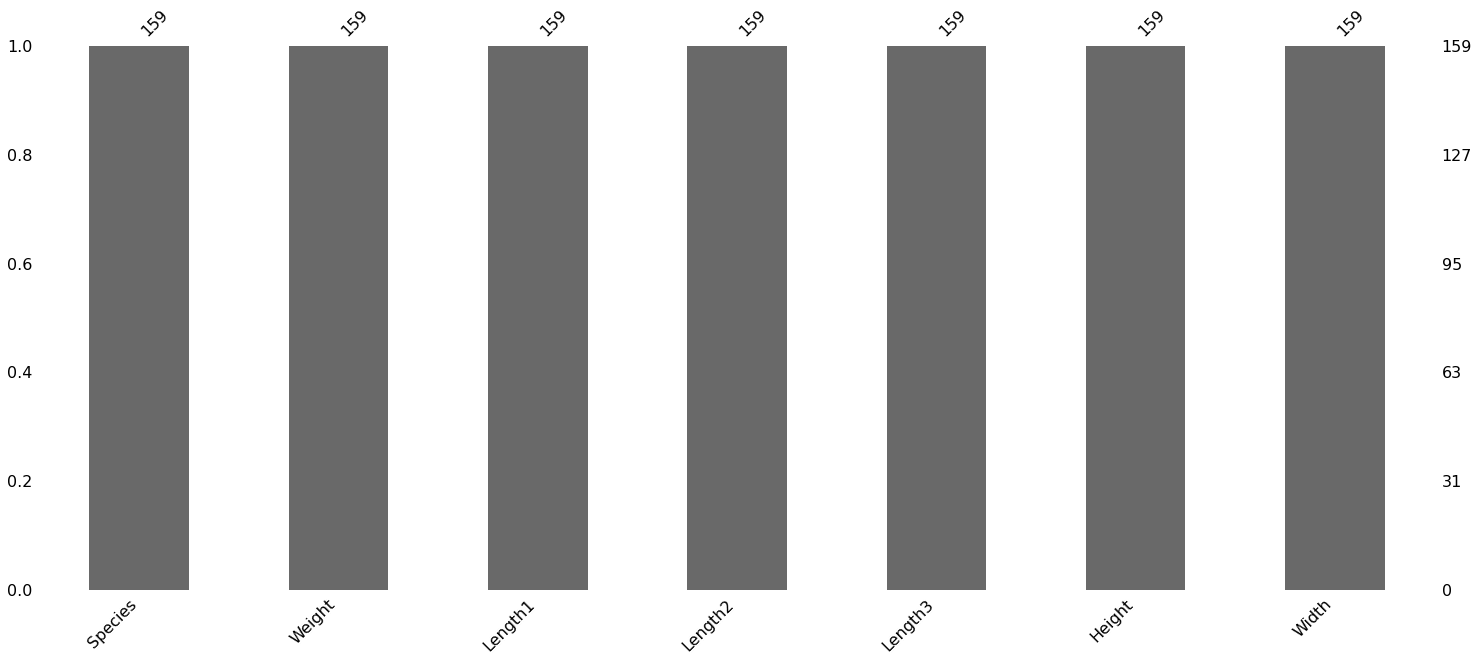

In [28]:
# another way to check missing values
import missingno as msno
msno.bar(df);

No missing Values

In [9]:
# To show different datatypes of the columns
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [10]:
# Using sweetviz to create further visualizations 
import sweetviz as sv

In [11]:
report= sv.analyze(df)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

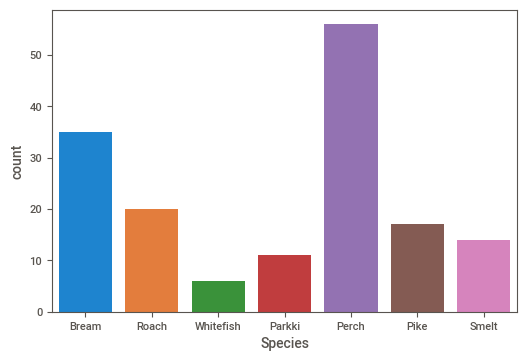

In [12]:
import seaborn as sns
sns.countplot(df['Species'])

In [13]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


In [4]:
from sklearn import preprocessing 
encoder = preprocessing.LabelEncoder() 
df['Species']= encoder.fit_transform(df['Species'])

In [5]:
# Assigning dependent and independent variables
X = df[['Weight','Length1','Length2','Length3','Height','Width']]
y=df.Species

In [6]:
# Standardization 
X = StandardScaler().fit_transform(X)


In [7]:
X

array([[-4.38072172e-01, -3.05788578e-01, -2.82303007e-01,
        -1.06020232e-01,  5.96578670e-01, -2.36528948e-01],
       [-3.03562184e-01, -2.25507242e-01, -1.98053663e-01,
        -2.33668373e-03,  8.21260549e-01, -6.65789457e-02],
       [-1.63447613e-01, -2.35542409e-01, -1.79331587e-01,
        -1.09769794e-02,  7.97341291e-01,  1.65793169e-01],
       [-9.89949100e-02,  5.30159764e-03,  5.46943678e-02,
         1.96390116e-01,  8.79771455e-01,  2.26210031e-02],
       [ 8.87586153e-02,  2.53719316e-02,  5.46943678e-02,
         2.39591594e-01,  8.12834979e-01,  4.26371272e-01],
       [ 1.44804444e-01,  5.54774324e-02,  1.20221635e-01,
         3.00073664e-01,  1.08395111e+00,  3.03431249e-01],
       [ 2.84919015e-01,  5.54774324e-02,  1.20221635e-01,
         2.82793073e-01,  1.21901769e+00,  5.12357880e-01],
       [-2.33330416e-02,  1.35758768e-01,  1.48304750e-01,
         3.25994551e-01,  8.65728838e-01,  1.62163285e-01],
       [ 1.44804444e-01,  1.35758768e-01,  1.483

In [33]:
y

0      0
1      0
2      0
3      0
4      0
      ..
154    5
155    5
156    5
157    5
158    5
Name: Species, Length: 159, dtype: int32

In [41]:
y.shape

(159,)

# ML Classifiers and Datasets (Training and Test)

In [8]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [10]:
y_pred=model.predict(X_test)

In [11]:
y_pred_df = pd.DataFrame(y_pred)

In [12]:
y_pred_df

,0
0,0
1,4
2,2
3,2
4,2
5,2
6,2
7,3
8,0
9,2


# Model Accuracy

In [13]:
accuracy_score(y_pred_df, y_test)

0.78125

# Conclusion

The model achieves 86% accuracy.

In [14]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [15]:
a=model.predict([[3,1,1,1,1,1]])

In [16]:
a

array([2])